In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
# train.head(2)
test.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


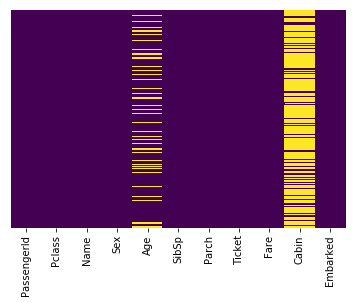

In [4]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [5]:
sns.set_style('whitegrid')

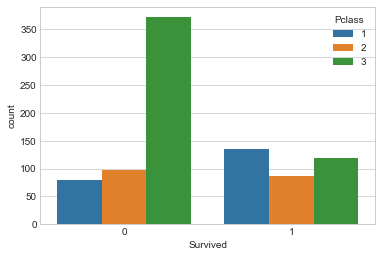

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=train)

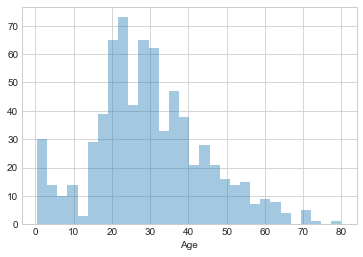

In [7]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


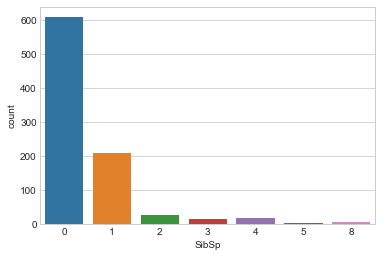

In [9]:
sns.countplot(x='SibSp', data=train)

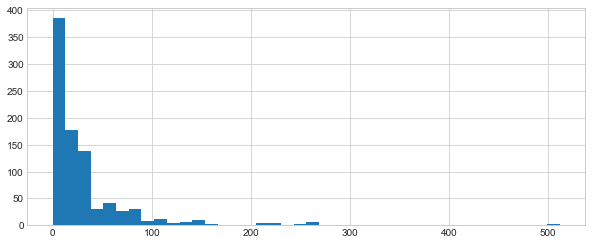

In [10]:
train['Fare'].hist(bins=40, figsize=(10,4))

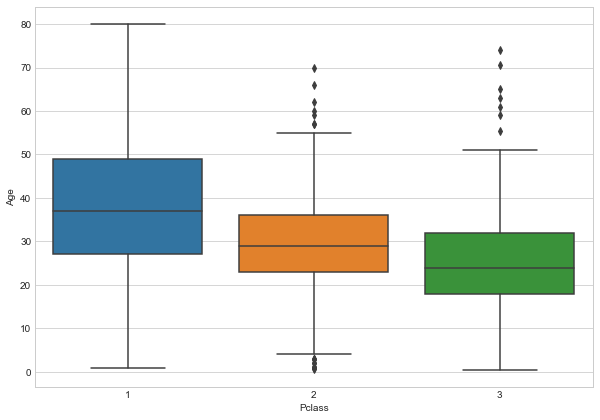

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [13]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

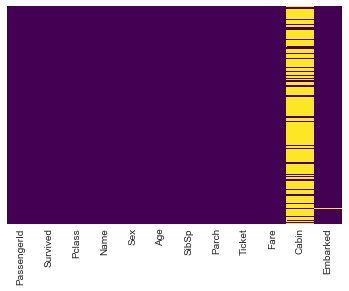

In [14]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [15]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [16]:
train.dropna(inplace=True)

In [17]:
sex_train = pd.get_dummies(train['Sex'], drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

In [18]:
embark_train = pd.get_dummies(train['Embarked'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [19]:
embark_test.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [20]:
train = pd.concat([train, sex_train, embark_train], axis=1)
test = pd.concat([test, sex_test, embark_test], axis=1)

In [21]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [22]:
test['Survived'] = ''
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,


In [23]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [25]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,
1,893,3,47.0,1,0,7.0000,0,0,1,
2,894,2,62.0,0,0,9.6875,1,1,0,
3,895,3,27.0,0,0,8.6625,1,0,1,
4,896,3,22.0,1,1,12.2875,0,0,1,


In [26]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
# X = test.drop('Survived', axis=1)
# y = train['Survived']

In [29]:
# from sklearn.model_selection import train_test_split

In [30]:
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
X_train = train.drop('Survived',axis=1)
X_test  = test.drop('Survived',axis=1)
y_train = train['Survived']
y_test  = test['Survived']  # for metrics use

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# X_test[X_test.isnull().any(axis=1)]
X_test.loc[152,'Fare']
# X_test.dropna(inplace=True)

0.0

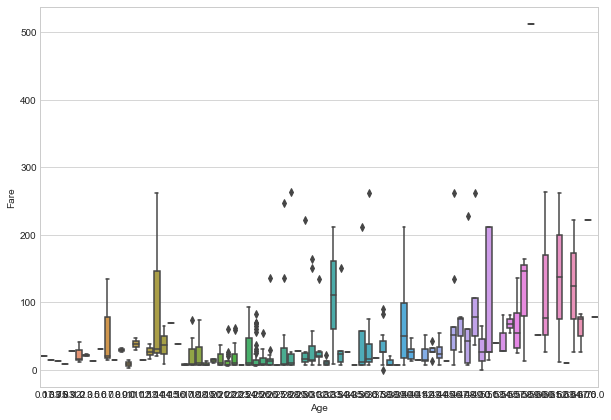

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Age', y='Fare', data=X_test)

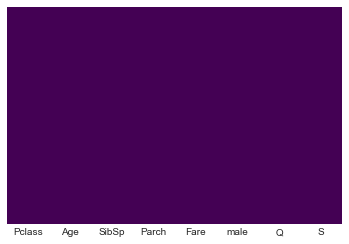

In [49]:
sns.heatmap(X_test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [50]:
predictions = logmodel.predict(X_test)

In [51]:

test['Survived'] = predictions

In [55]:
new_test = pd.read_csv('titanic_test.csv')

In [58]:
new_test['Survived'] = predictions

In [62]:
new_test.to_csv(path_or_buf='predictions.csv',columns=['PassengerId', 'Survived'])